In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline
from factor_analyzer import FactorAnalyzer

In [215]:
df1 = pd.read_csv('H:\Downloads\Great learning\Adv.Statistics\Project\SalaryData.csv')

In [216]:
df1.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [217]:
df1.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [218]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [219]:
df1.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [220]:
df1.Education = pd.Categorical(df1.Education)

In [221]:
df1.Occupation = pd.Categorical(df1.Occupation)

## Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

[Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

### 1.State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### Hypothesis for Education level and salary

Null hypothesis, H0: Mean salary is the same on all the education level.

Alternative hypothesis, Ha: Mean salary is not the same on all the education 
level.

### Hypothesis for Occupation and Salary

Null hypothesis, H0: Mean salary is the same on all the Occupation levels.

Alternative hypothesis, Ha: Mean salary is not the same on all the Occupation 
levels.

### 2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [271]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)
print('Since the p-value is less than 0.05, we reject the null hypothesis')

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN
Since the p-value is less than 0.05, we reject the null hypothesis


### 3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [223]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)
print('Since the p-value is more than 0.05, we accept the null hypothesis')

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN
Since the p-value is more than 0.05, we accept the null hypothesis


### 4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

The null hypothesis is rejected in (1.2). The salary mean is 
significantly different across the different education levels.

## Problem 1B:

### 1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

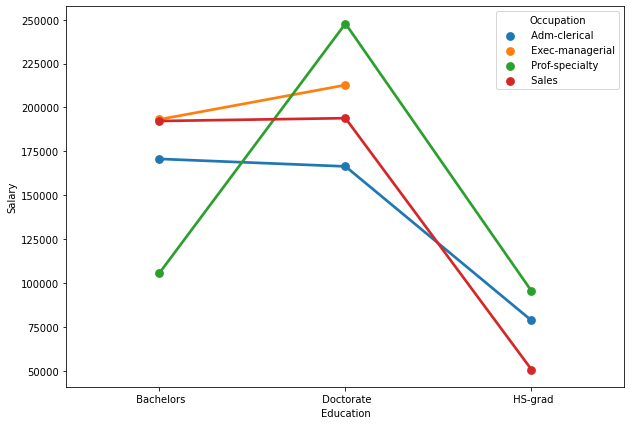

In [224]:
plt.figure(figsize=(10,7))
sns.pointplot(x='Education', y='Salary', data=df1, hue='Occupation', ci=None);

### 2.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

### Hypothesis for interaction between education and occupation

### Null hypothesis

Null hypothesis for interaction, H0: There is no interaction between education and Occupation.

### Alternative hypothesis

Alternative hypothesis for interaction, Ha: There is interaction between education and Occupation.

In [272]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)
print('Since the p-value for Education*Occupation is less than 0.05, we can reject the null hypothesis')

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  
Since the p-value for Education*Occupation is less than 0.05, we can reject the null hypothesis


### 3.Explain the business implications of performing ANOVA for this particular case study.

## Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [226]:
df2 = pd.read_csv('H:\Downloads\Great learning\Adv.Statistics\Project\Education+-+Post+12th+Standard.csv')

In [227]:
df2.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [228]:
df2.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [229]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [230]:
dups= df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 2.1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [231]:
df2.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

### The univariate analysis helps us to understand the various features present in our dataset. It visually gives us an idea about how the data is distributed and presence of outliers in them. Here all the features in our dataset except Top25perc feature are having outliers.

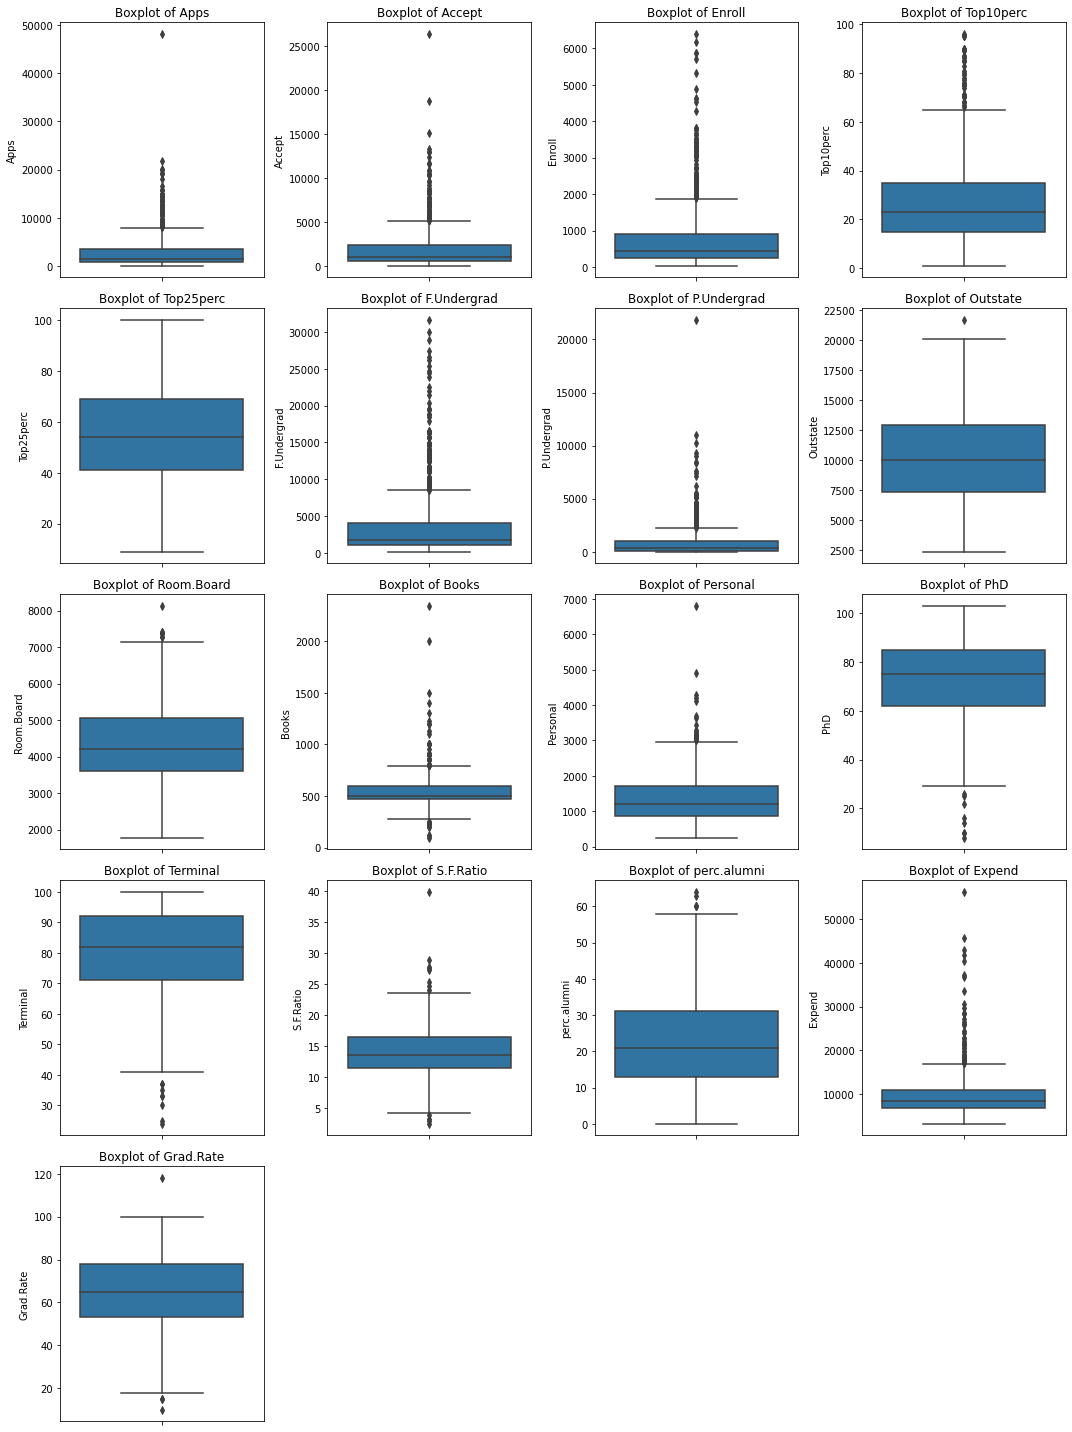

In [274]:
plt.figure(figsize = (15,20))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

The multivariate analysis of our data, this pairplot helps us to undersatnd the relationship and patterns between the features.


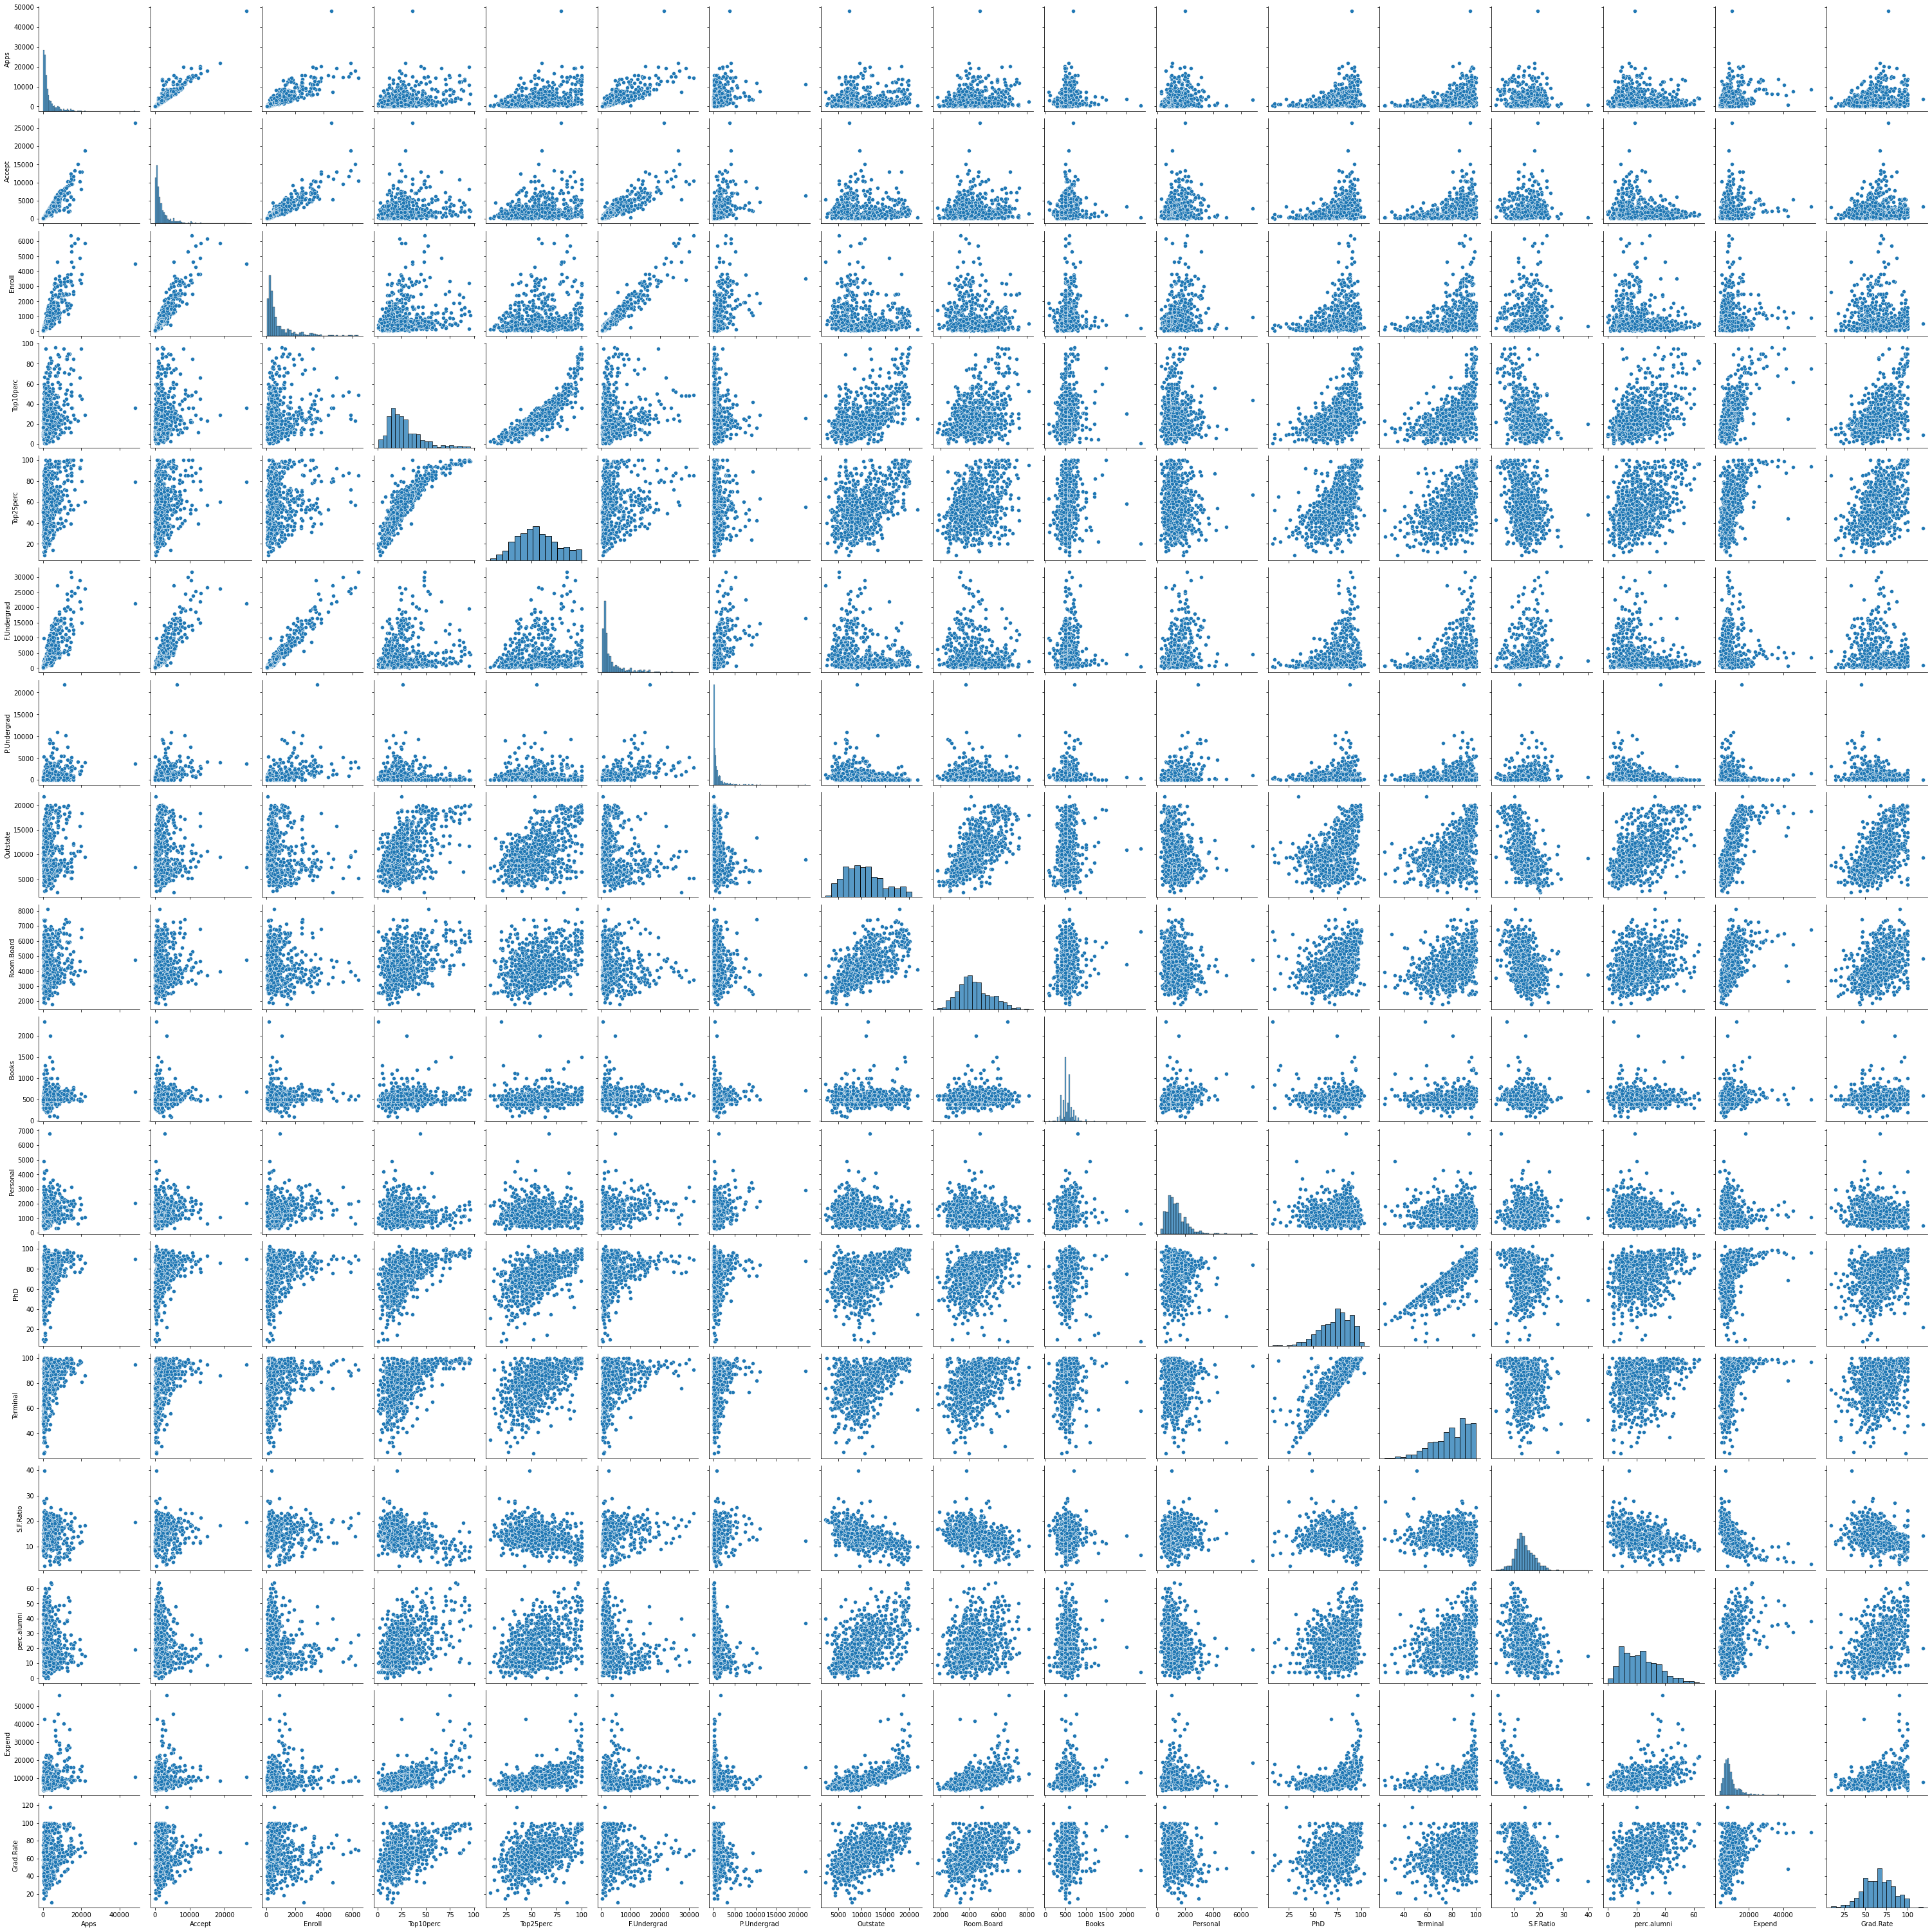

In [249]:
print('The multivariate analysis of our data, this pairplot helps us to undersatnd the relationship and patterns between the features.')
sns.pairplot(df2);

HEATMAP


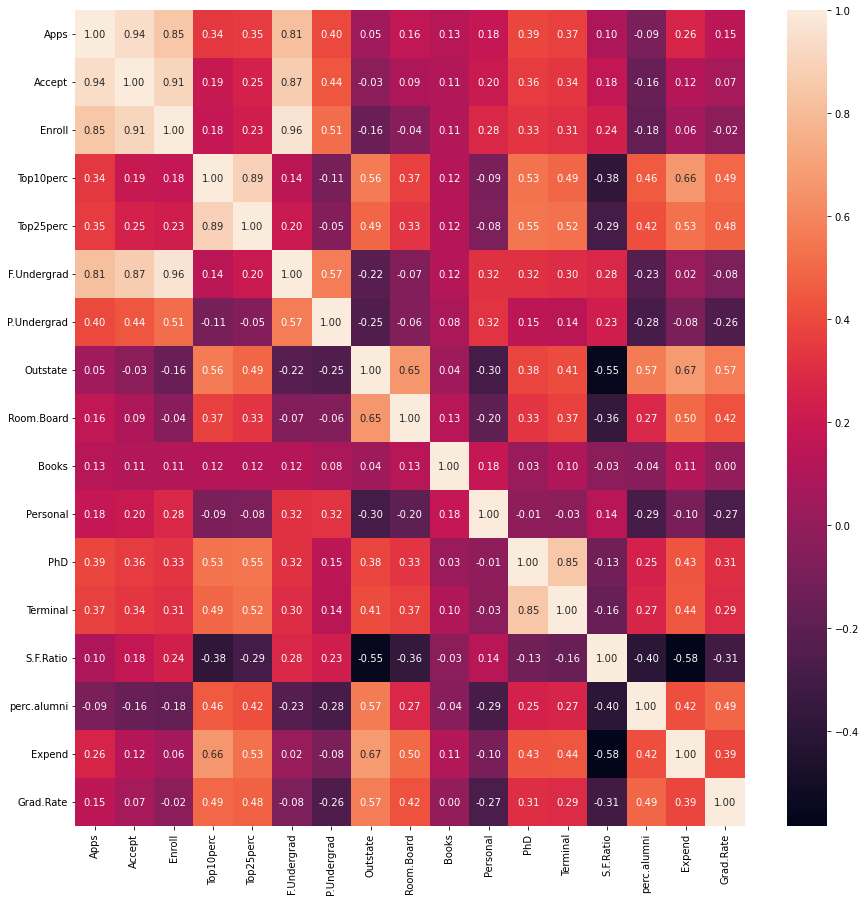

In [250]:
print('HEATMAP')
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,fmt=".2f");

### This heatmap gives us the correlation between the numerical variables. Here we can see the number of applications received is having high correlation with number of applications accepted(0.94) and number of new students enrolled(0.85).

### 2.2. Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [251]:
cat=[]
num=[]
for i in df2.columns:
    if df2[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print('The Categorical variable is:', cat) 
print('The numerical variable is:', num)

The Categorical variable is: ['Names']
The numerical variable is: ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


In [252]:
from scipy.stats import zscore
data_scaled=df2[num].apply(zscore)

In [253]:
data_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

#### The data in our dataset has high varying data points with different magnitudes(like extreme values in each feature), scaling is done so that our data gets standardized within a specific scale, like 0-1. Algorithm will treat a scaled data with equal weightage to all datapoints and higher magnitude data points does not dominate over the lower magnitude data points.

### 2.3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

### Both the covariance and the correlation matrices are used to find the relationship between the features. The covariance matrix gives us the direction of relationship(positive or negative) and the correlation matrix gives us both direction and strength of the relationship.

In [254]:
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

The correlation matrix/heatmap helps us to understand the strength and type(positive or negative) of relation between the variables.Here Top10% and Top25% are highly corelated.


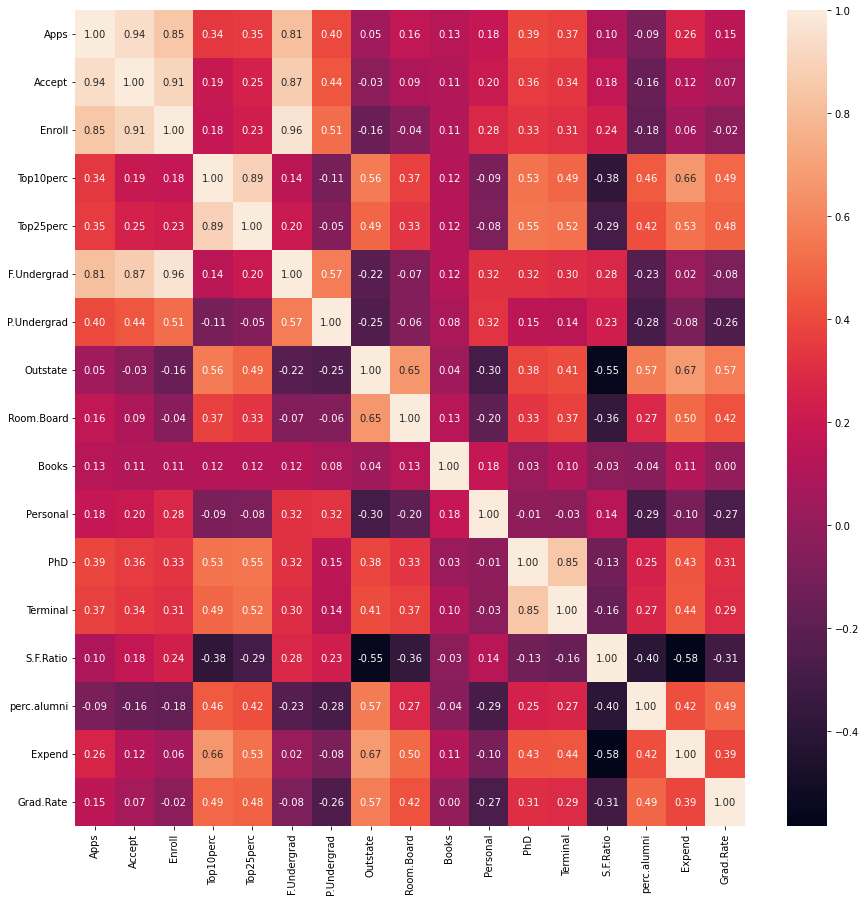

In [255]:
print('The correlation matrix/heatmap helps us to understand the strength and type(positive or negative) of relation between the variables.Here Top10% and Top25% are highly corelated.')
plt.figure(figsize=(15,15))
sns.heatmap(data_scaled.corr(),annot=True,fmt=".2f");

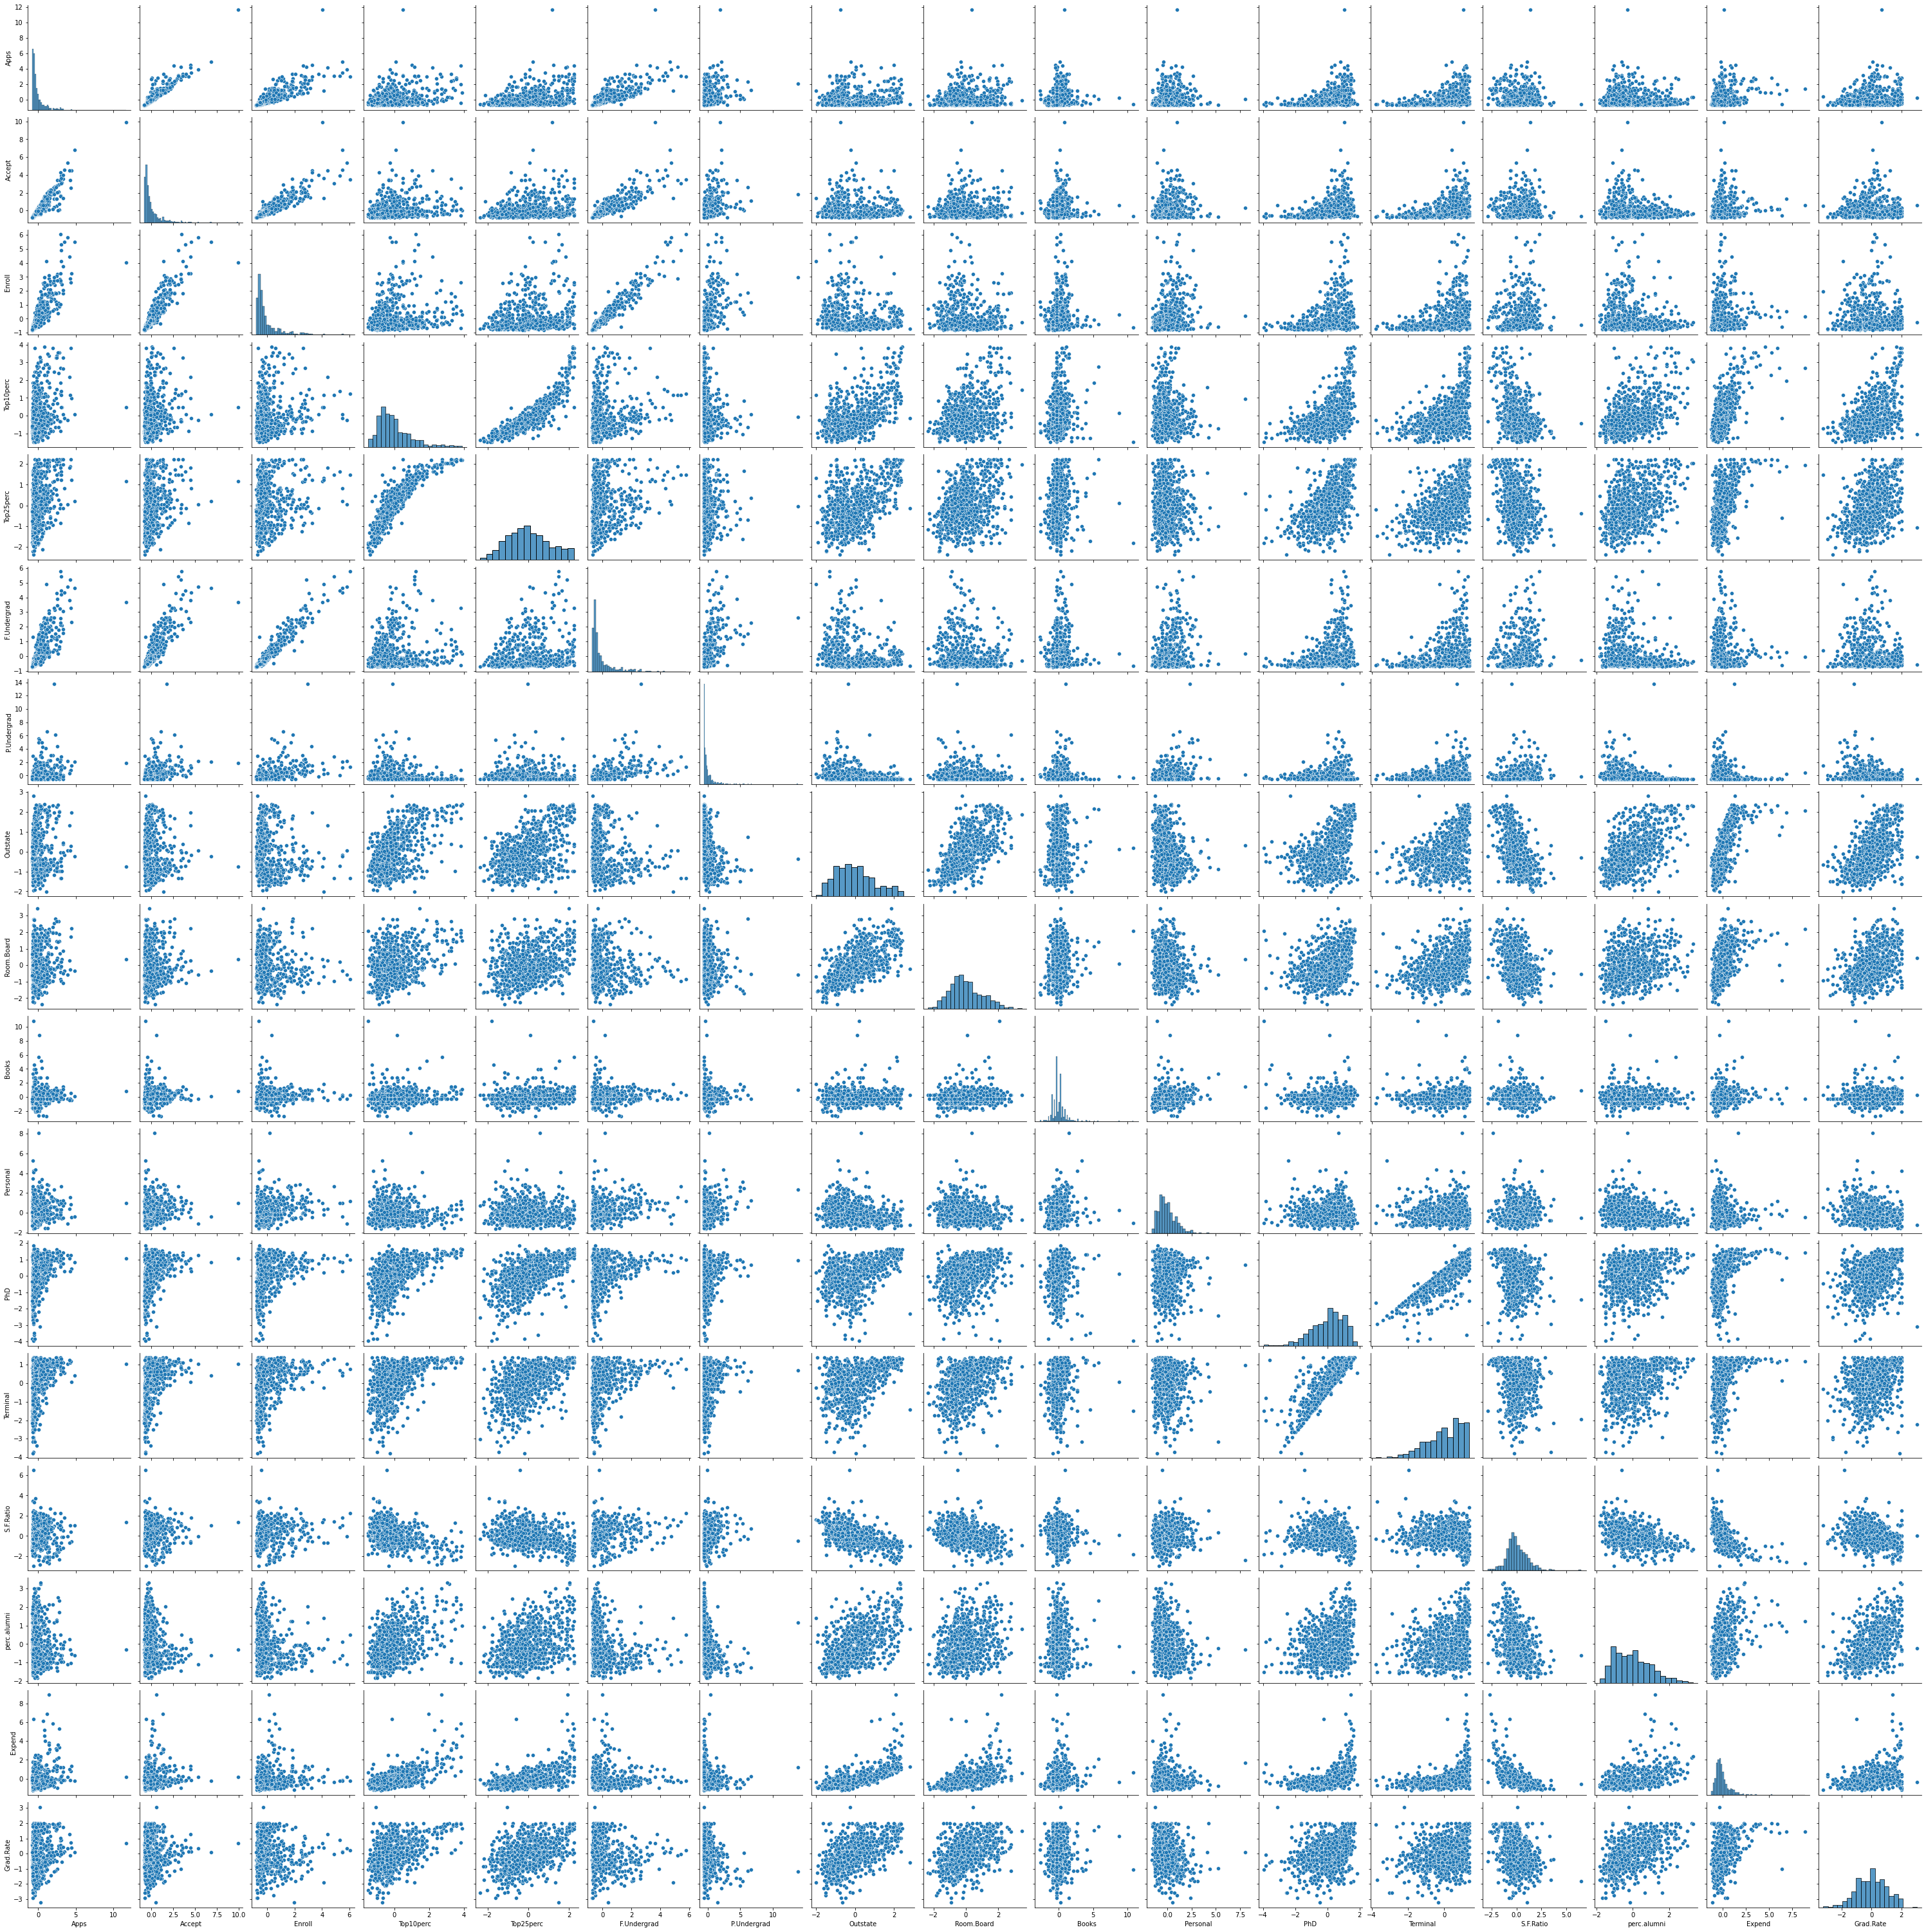

In [256]:
sns.pairplot(data_scaled);

### 2.4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

In [257]:
df_pca=df2[num]

The boxplot of data before scaling


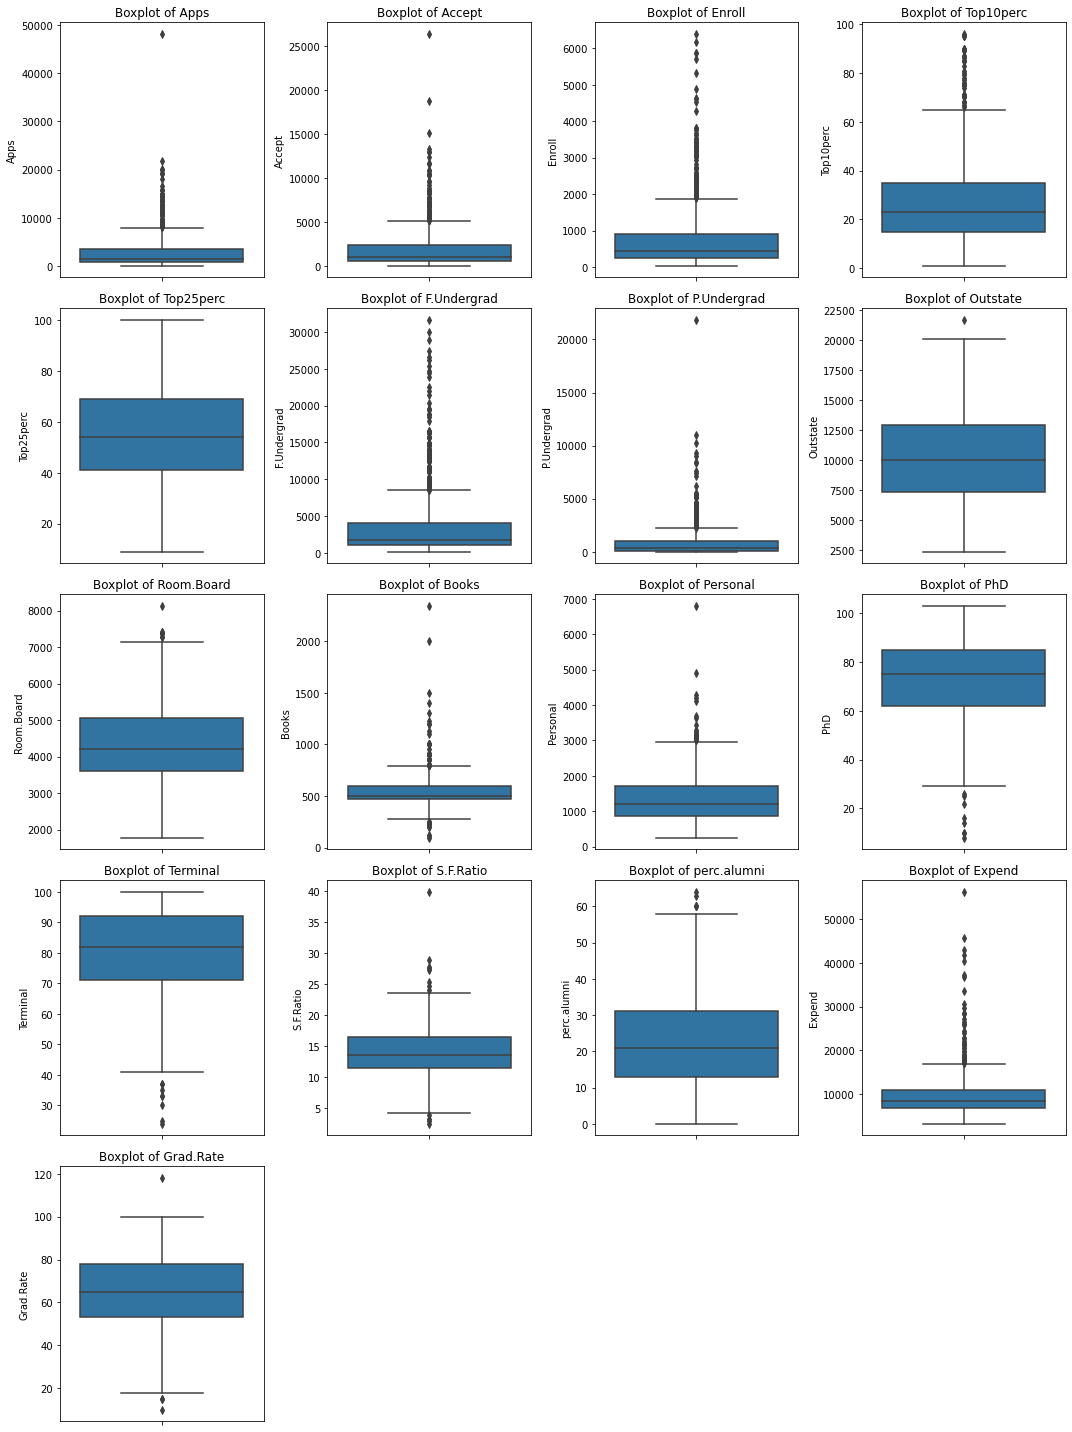

In [258]:
print('The boxplot of data before scaling')
plt.figure(figsize = (15,20))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

The boxplot of scaled data


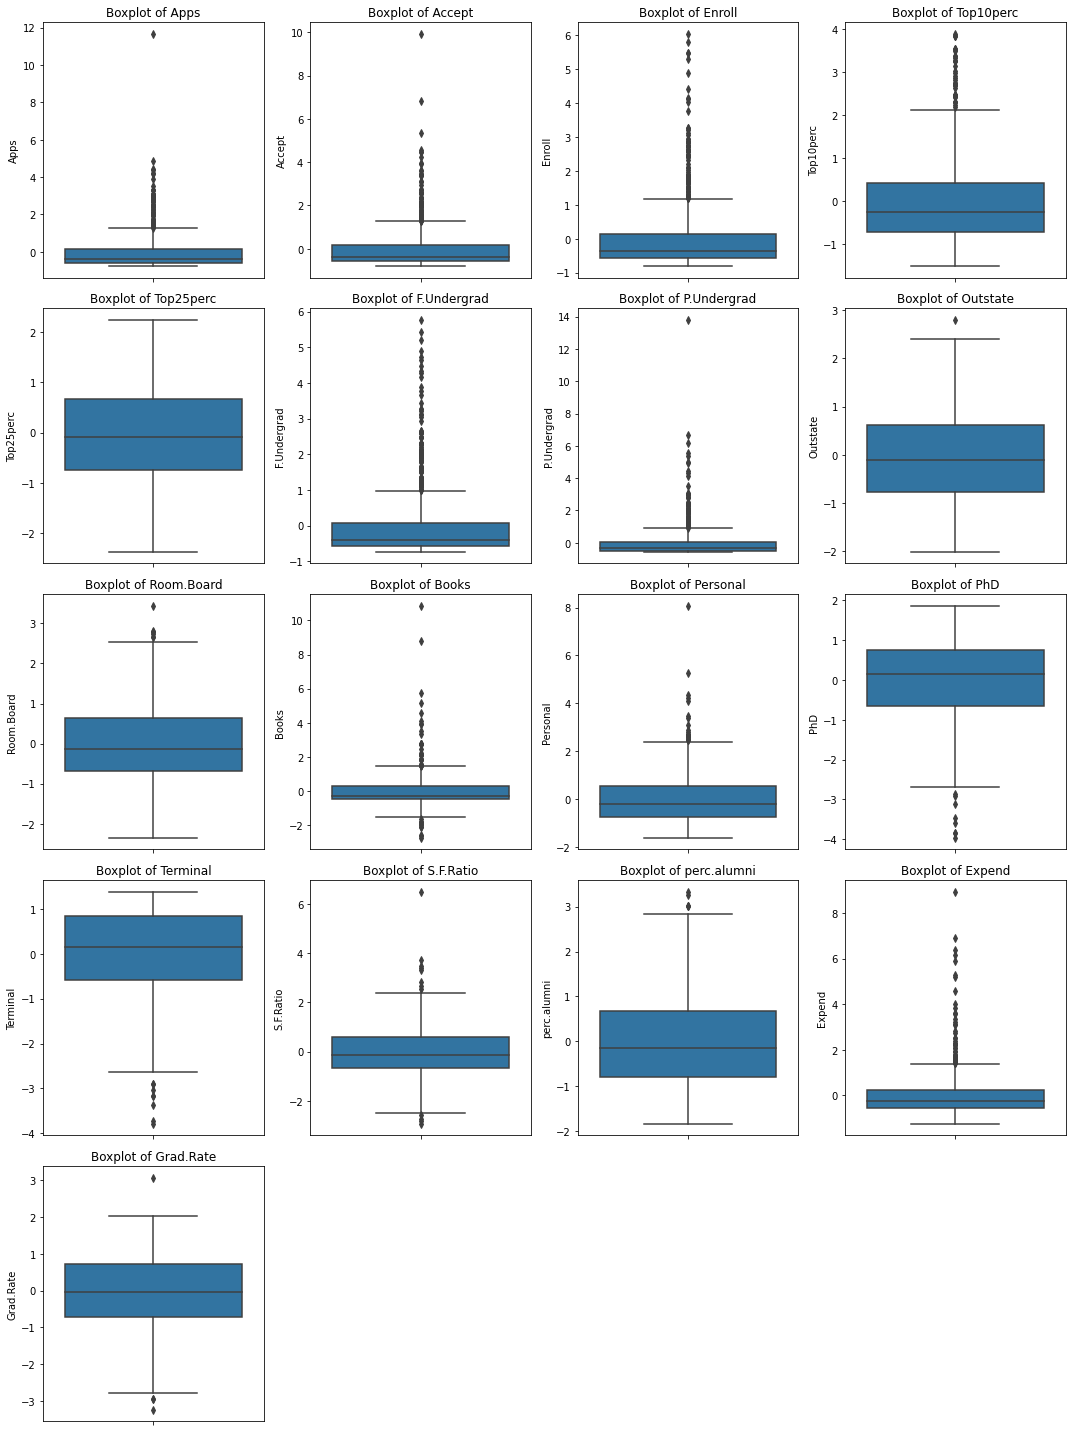

In [259]:
print('The boxplot of scaled data')
plt.figure(figsize = (15,20))
feature_list = data_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = data_scaled[feature_list[i]], data = data_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### The outliers are present in the dataset before and after the scaling of data. However the range in the y axis have changed to a comparable range after scaling the data. Scaling of data have not removed the outliers.

### 2.5. Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [260]:
len(df_pca.columns)

17

In [261]:
df_pca_scaled = df_pca.apply(zscore)

In [262]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [263]:
#Eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [264]:
#Eigen Values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [265]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

### 2.6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [266]:
dataframe_PC = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14', 'PC15', 'PC16', 'PC17'],
                                    index = df_pca_scaled.columns)

In [267]:
dataframe_PC

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

### 2.7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [268]:
print('The Linear equation of 1st PC: ')
for i in range(0,df_pca_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_pca_scaled.columns[i]),end=' + ')

The Linear equation of 1st PC: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

### 2.8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [269]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

#### cummulative values of eigen values is used to identify the optimum number of PC , if we look at the first 5 or 6 PC the valuable 76% to 81% information in our entire data is captured. Therefore we can drop the remaining PC. If we add all the 17 PC we will get 100%
#### Based on this we can select the first 5 PC which covers the 76% of valuable information.
#### The eigen vectors indicate the weightage of the variables.

### 2.9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

### The PCA helps us to understand the data given in our dataset. initial based on the univariate and multivariate analysis we can visualize our data and understand the distribution and the skew nature of it. Further we can also understand how the data values are corelated and how strong or weak is that corelation is present in our dataset.
### After understanding the data PCA can be performed and valuable principle components can be identified. In our data we found first five PC to be valuable and can be used for further analysis.

In [276]:
print('Have a good day!!')

Have a good day!!
